In [1]:
#data loading
import pandas as pd
filename="/content/WVS.csv"
a=pd.read_csv(str(filename))

print(a)

      rownames      poverty religion degree country  age  gender
0            1   Too Little      yes     no     USA   44    male
1            2  About Right      yes     no     USA   40  female
2            3   Too Little      yes     no     USA   36  female
3            4     Too Much      yes    yes     USA   25  female
4            5   Too Little      yes    yes     USA   39    male
...        ...          ...      ...    ...     ...  ...     ...
5376      5377  About Right      yes     no  Sweden   49    male
5377      5378   Too Little      yes     no  Sweden   37  female
5378      5379   Too Little      yes     no  Sweden   54  female
5379      5380   Too Little      yes     no  Sweden   32    male
5380      5381   Too Little      yes     no  Sweden   36  female

[5381 rows x 7 columns]


In [2]:
##Checking for null values
a.isna().sum()

,0
rownames,0
poverty,0
religion,0
degree,0
country,0
age,0
gender,0


In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="poverty"

#transform string into int
transformColumns={1,2,3,4,6}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  poverty  religion  degree  country  age  gender
0            1        1         1       0        3   44       1
1            2        0         1       0        3   40       0
2            3        1         1       0        3   36       0
3            4        2         1       1        3   25       0
4            5        1         1       1        3   39       1
...        ...      ...       ...     ...      ...  ...     ...
5376      5377        0         1       0        2   49       1
5377      5378        1         1       0        2   37       0
5378      5379        1         1       0        2   54       0
5379      5380        1         1       0        2   32       1
5380      5381        1         1       0        2   36       0

[5381 rows x 7 columns]


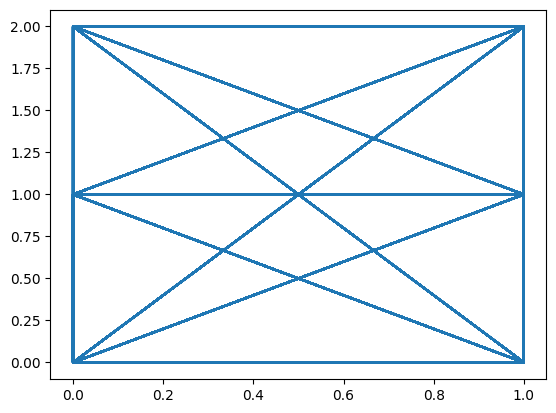

In [5]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 5381 artists>

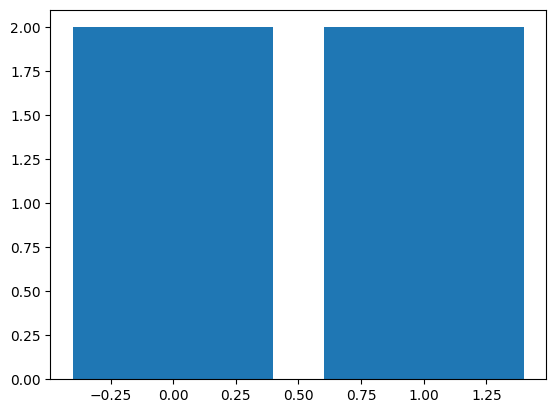

In [6]:
plt.bar(a[a.columns[2]],a[str(target)])

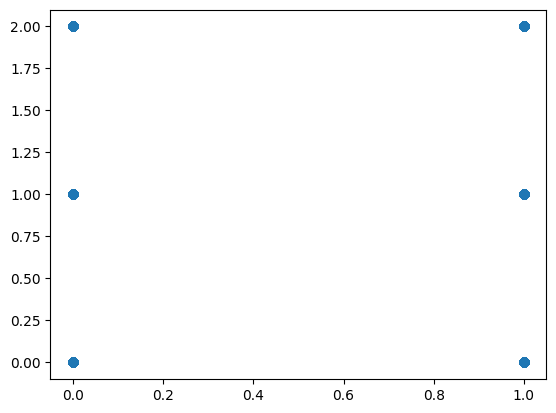

In [7]:
plt.scatter(a[a.columns[3]], a[str(target)])

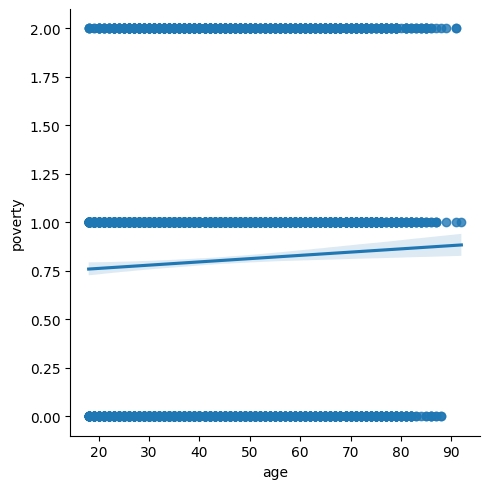

In [9]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="age",y="poverty",data=a)

<Axes: xlabel='country', ylabel='poverty'>

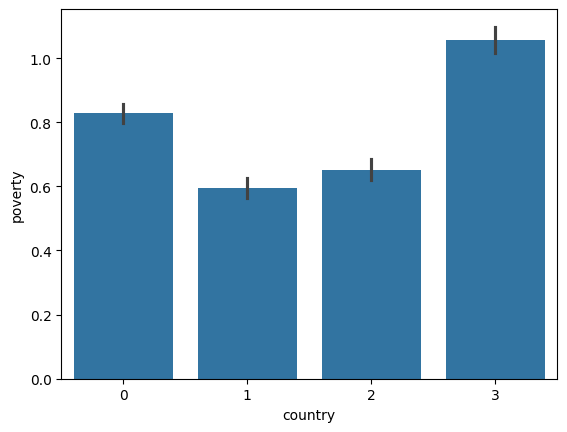

In [10]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='country', ylabel='poverty'>

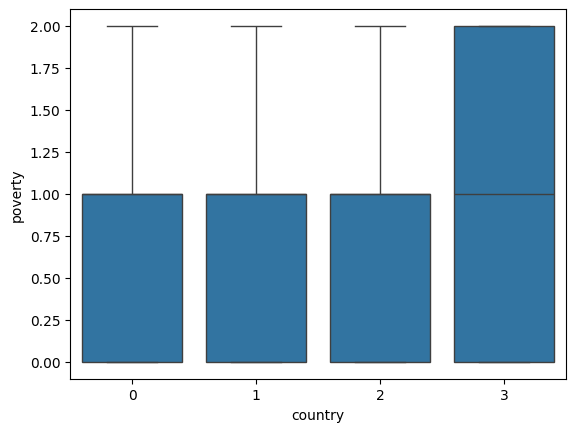

In [12]:
sns.boxplot(x=a.columns[4],y=str(target),data=a)

<ipython-input-13-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='poverty', ylabel='Density'>

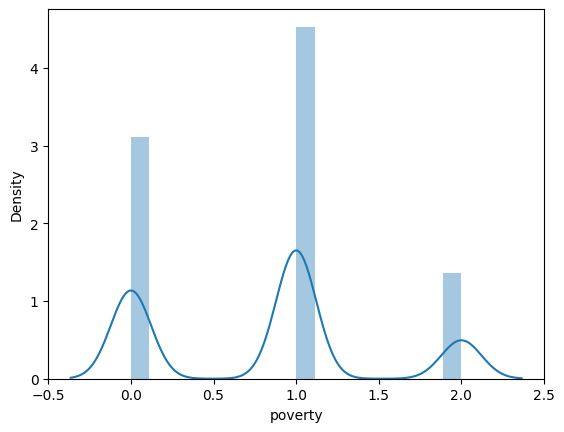

In [13]:
sns.distplot(a[str(target)])

<Axes: xlabel='degree', ylabel='Density'>

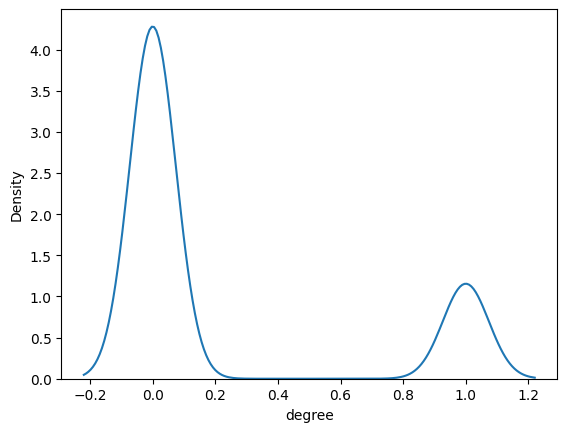

In [14]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='religion', ylabel='count'>

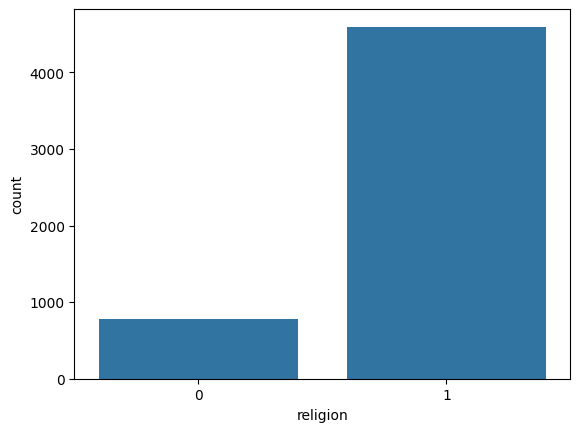

In [15]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

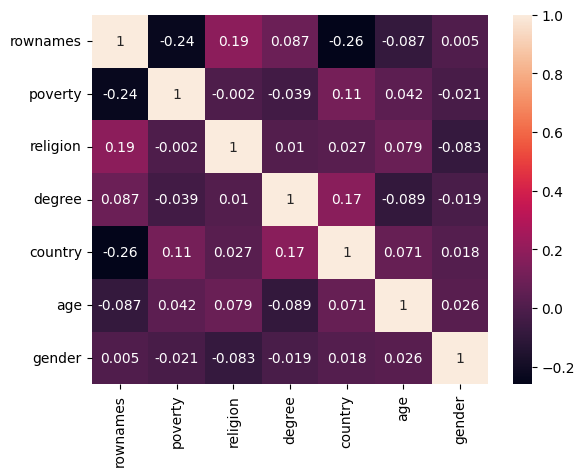

In [16]:
#data=a.select_dtypes(include=np.number).corr()
data=a.corr()

sns.heatmap(data, annot=True)

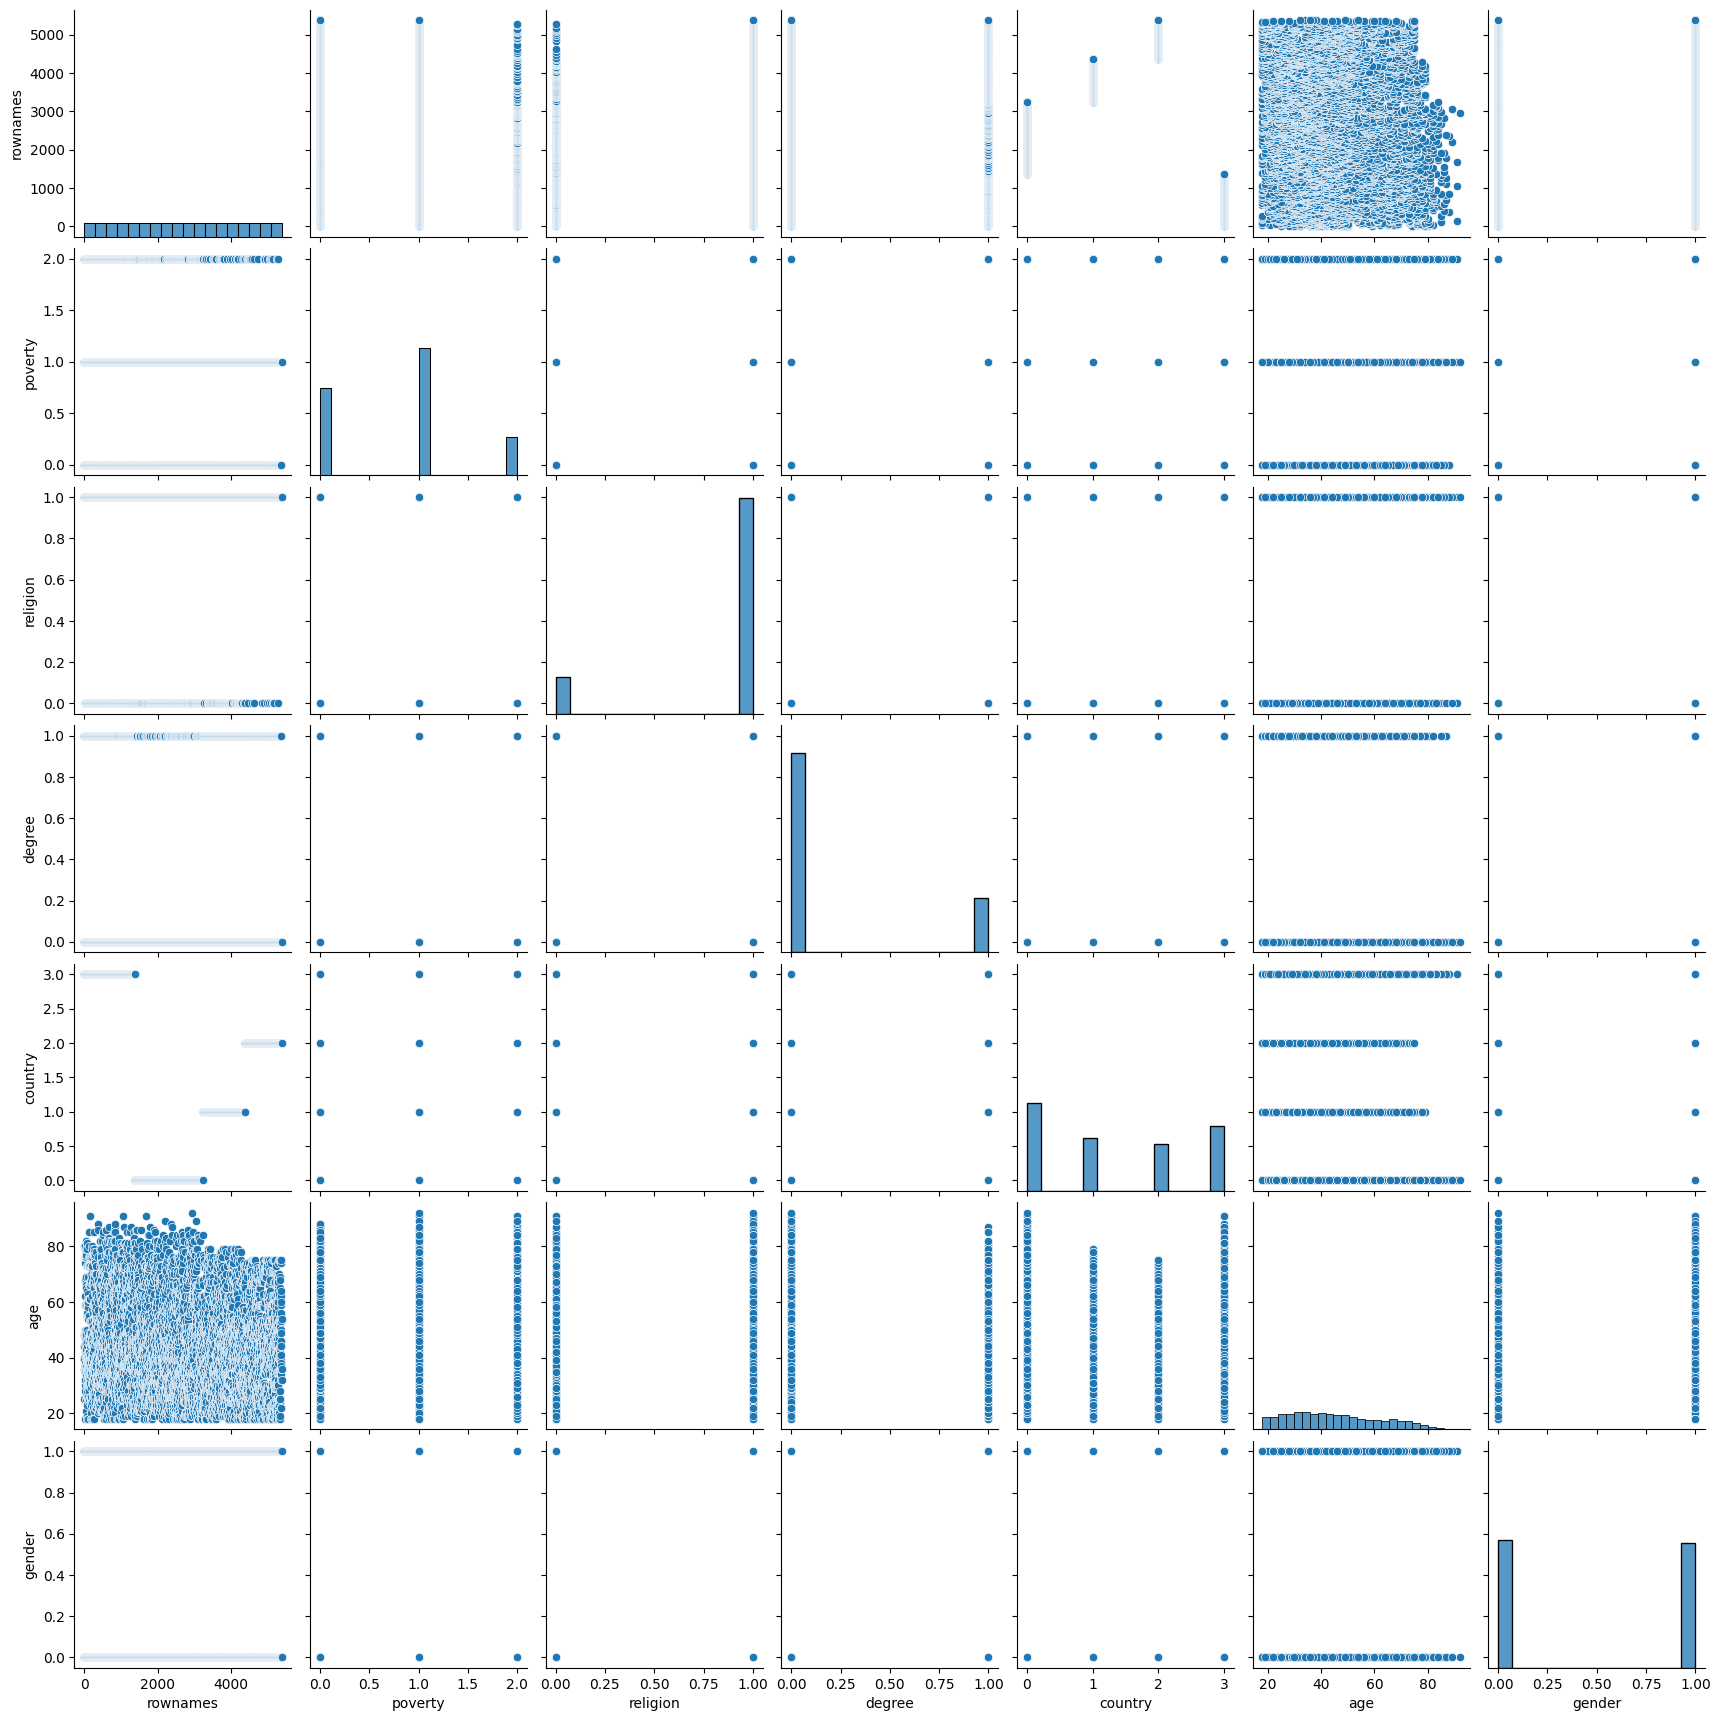

In [17]:
sns.pairplot(data=a)

In [18]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  religion  degree  country  age  gender
0            1         1       0        3   44       1
1            2         1       0        3   40       0
2            3         1       0        3   36       0
3            4         1       1        3   25       0
4            5         1       1        3   39       1
...        ...       ...     ...      ...  ...     ...
5376      5377         1       0        2   49       1
5377      5378         1       0        2   37       0
5378      5379         1       0        2   54       0
5379      5380         1       0        2   32       1
5380      5381         1       0        2   36       0

[5381 rows x 6 columns]


In [19]:
print(y)

0       1
1       0
2       1
3       2
4       1
       ..
5376    0
5377    1
5378    1
5379    1
5380    1
Name: poverty, Length: 5381, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
print(x_train)

      rownames  religion  degree  country  age  gender
1954      1955         0       0        0   24       1
5165      5166         1       0        2   54       0
163        164         0       1        3   66       1
459        460         1       0        3   42       1
2404      2405         1       0        0   62       1
...        ...       ...     ...      ...  ...     ...
4728      4729         1       0        2   68       1
908        909         1       0        3   63       0
873        874         1       0        3   65       1
3552      3553         1       0        1   30       0
771        772         1       1        3   28       1

[4304 rows x 6 columns]


In [22]:
print(y_train)

1954    1
5165    1
163     2
459     1
2404    0
       ..
4728    1
908     2
873     1
3552    0
771     2
Name: poverty, Length: 4304, dtype: int64


In [23]:
print(x_test)

      rownames  religion  degree  country  age  gender
2080      2081         1       0        0   50       1
3191      3192         1       0        0   43       0
3966      3967         0       0        1   34       0
261        262         1       0        3   60       1
1594      1595         1       0        0   28       1
...        ...       ...     ...      ...  ...     ...
3027      3028         0       0        0   23       1
1115      1116         1       1        3   39       0
2445      2446         1       0        0   35       1
3607      3608         1       0        1   49       0
4059      4060         1       0        1   29       1

[1077 rows x 6 columns]


In [24]:
print(y_test)

2080    1
3191    1
3966    1
261     0
1594    1
       ..
3027    0
1115    0
2445    1
3607    1
4059    0
Name: poverty, Length: 1077, dtype: int64


In [25]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [26]:
print(ypred)

[0.81267511 0.73661057 0.61895832 ... 0.77164604 0.73569945 0.65118049]


In [27]:
print(model.predict([[2081,1,0,0,50,1]]))

[0.81267511]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [29]:
print(ypred)

[0. 0. 0. ... 1. 1. 0.]


In [30]:
print(model.predict([[2081,1,0,0,50,1]]))

[0.81267511]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [32]:
print(ypred)

[1.43 0.41 0.85 ... 0.64 0.67 0.28]


In [33]:
print(model.predict([[2081,1,0,0,50,1]]))

[0.81267511]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
